In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heartdisease.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
## Null check
df.isnull().sum().sum()

645

In [5]:
## Filing the Nan values
df.fillna(0,inplace = True)

In [6]:
df.isnull().sum().sum()

0

In [7]:
shuffle_df = df.sample(frac = 1)

In [8]:
shuffle_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
466,0,57,3.0,1,15.0,0.0,0,0,0,250.0,125.0,74.0,21.08,80.0,72.0,0
1783,1,62,1.0,1,10.0,0.0,0,0,0,157.0,134.0,84.0,25.95,105.0,76.0,1
3652,0,41,3.0,1,15.0,0.0,0,1,0,268.0,140.0,92.5,24.71,75.0,90.0,0
217,1,49,1.0,1,30.0,0.0,0,0,0,237.0,114.0,85.5,28.57,88.0,92.0,0
2336,0,49,1.0,1,9.0,0.0,0,0,0,235.0,109.0,70.0,28.66,74.0,73.0,1


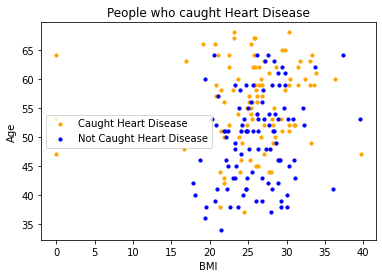

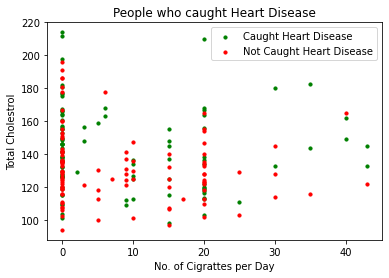

In [9]:
## Visualising our data
Y = shuffle_df.iloc[:,-1]
caught_disease = shuffle_df.loc[Y==1]
not_caught_disease = shuffle_df.loc[Y==0]

plt.ylabel('Age')
plt.xlabel('BMI')
plt.title('People who caught Heart Disease')
plt.scatter(caught_disease.iloc[:100,12],caught_disease.iloc[:100,1] , s = 10 , c = 'orange' , label = 'Caught Heart Disease')
plt.scatter(not_caught_disease.iloc[:100,12],not_caught_disease.iloc[:100,1] , s = 10 , c = 'blue' , label = 'Not Caught Heart Disease')
plt.legend()
plt.show()

plt.ylabel('Total Cholestrol')
plt.xlabel('No. of Cigrattes per Day')
plt.title('People who caught Heart Disease')
plt.scatter(caught_disease.iloc[:100,4],caught_disease.iloc[:100,10] , s = 10 , c = 'green' , label = 'Caught Heart Disease')
plt.scatter(not_caught_disease.iloc[:100,4],not_caught_disease.iloc[:100,10] , s = 10 , c = 'red' , label = 'Not Caught Heart Disease')
plt.legend()
plt.show()

In [10]:
y = shuffle_df.iloc[:,-1]
x = shuffle_df.iloc[:,:-1]

train_size = int(0.7* len(shuffle_df))

In [11]:
## Splitting dataset into train and test
X_train , X_test , y_train , y_test = x[:train_size] , x[train_size:] , y[:train_size] , y[train_size:]

In [12]:
X_train.shape[1]

15

In [26]:
## Preping our data
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
theta = np.zeros([1,X_train.shape[1]])


In [27]:
X_train.shape[1]

17

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [34]:
def compute_cost(X, y, theta):
    m = len(y)
    
    h = sigmoid(X @ theta.T)
    epsilon = 1e-5
    cost = 1/m * np.sum((-y) @ np.log(sigmoid(X @ theta.T)) - (1-y) @ np.log(1 - sigmoid(X @ theta.T )))
    return cost

In [35]:
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    
    costing = np.zeros((iters,1))

    for i in range(iters):
        ALPHA = sigmoid(X @theta.T)
        BETA = (ALPHA - y).T
        SIGMA = alpha/m * (BETA @ X)
        theta = theta - SIGMA
        costing[i] = compute_cost(X, y, theta)

    return theta

In [36]:
def predict(X, theta):
    return np.round(sigmoid(X @ theta.T))

In [37]:


alpha = 0.03
iters = 1000

initial_cost = compute_cost(X_train, y_train, theta)




In [38]:
THETA = gradient_descent(X_train, y_train, theta, alpha, iters)



Exception: Data must be 1-dimensional

In [ ]:
y_pred = predict(X_train, THETA)
score = float(sum(y_pred == y))/ float(len(y))

print(score)